In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

old_results = pd.read_csv('CLUMPS_2018_results.txt',sep='\t')


new_results = pd.read_csv('clumps_output_pancan.tsv',sep='\t')
#new_results = pd.read_csv('clumps_output.tsv',sep='\t')

In [2]:
new_results.index = (new_results['GENE_NAMES'] + ':' + new_results['PDBID-CHAIN'] + ':' + new_results['MAP_START'].astype(str) + ':' + new_results['MAP_END'].astype(str))
old_results.index = (old_results['GENE_NAMES'] + ':' + old_results['PDBID-CHAIN'] + ':' + old_results['MAP_START'].astype(str) + ':' + old_results['MAP_END'].astype(str))
new_results = new_results.loc[~new_results.index.isna()]
old_results = old_results.loc[~old_results.index.isna()]

In [3]:
new_results

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
TP53:3q01-B:94:356,0,TP53,0.0,0.0,3400,154,97+104+105+106+107+108+109+110+111+113+119+120...,P04637,P04637,3q01-B,100.0,P53 DNA-BINDING (RES 94-291) AND OLIGOMERIZATI...,393.0,94,356,TP53,0.0
PTPN11:4h34-A:4:541,1,PTPN11,0.0,0.0,143,85,13+23+26+28+33+40+45+52+54+55+60+61+64+69+71+7...,Q06124,Q06124,4h34-A,100.0,"N-SH2, C-SH2 AND PHOSPHATASE DOMAIN",593.0,4,541,PTPN11,0.0
DICER1:2eb1-B:1660:1849,2,DICER1,0.0,0.0,59,32,1661+1667+1670+1675+1694+1699+1703+1705+1709+1...,Q9UPY3,Q9UPY3,2eb1-B,100.0,"C-TERMINAL RNASE III DOMAIN, RNASE III 2",1922.0,1660,1849,DICER1,0.0
PIK3CA:5fi4-A:2:1062,3,PIK3CA,0.0,0.0,1625,211,9+11+12+13+19+27+33+36+38+39+50+57+65+66+69+71...,P42336,P42336,5fi4-A,100.0,NaN,1068.0,2,1062,PIK3CA,0.0
PTEN:5bug-A:14:351,4,PTEN,0.0,0.0,479,154,14+15+19+24+25+27+28+29+30+31+32+33+34+35+36+3...,P60484,P60484,5bug-A,100.0,PTEN WT 14-351 DELTA 286-309,403.0,14,351,PTEN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OLFM3:5ftu-C:163:466,13976,OLFM3,1.0,1.0,100,87,165+166+169+171+172+173+175+176+177+179+180+18...,Q96PB7,Q80TS3,5ftu-C,38.0,LECTIN AND OLFACTOMEDIN DOMAINS,478.0,163,466,NaN,-1.0
PLEKHH2:2yry-A:693:799,13977,PLEKHH2,1.0,1.0,25,23,693+695+703+707+710+713+718+723+726+730+734+73...,Q8IVE3,Q9Y2H5,2yry-A,32.8,PH DOMAIN,1493.0,693,799,NaN,-1.0
CAND1:4a0c-B:3:1216,13978,CAND1,1.0,1.0,183,190,16+19+21+24+27+37+38+49+65+72+74+77+80+84+85+8...,Q86VP6,Q86VP6,4a0c-B,100.0,NaN,1230.0,3,1216,NaN,-1.0
CYB5R2:5gv7-A:9:276,13979,CYB5R2,1.0,1.0,31,32,13+19+68+72+77+92+94+103+112+113+118+120+123+1...,Q6BCY4,P83686,5gv7-A,60.8,NaN,276.0,9,276,NaN,-1.0


In [4]:
old_results

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
ATM:5np1-A:3:3056,ATM,Q13315,"C,S,M",Q13315,5np1-A,NaN,3056.0,3,3056,100.0,388,403,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
BRAF:3d4q-B:448:723,BRAF,P15056,"C,S,M",P15056,3d4q-B,NaN,766.0,448,723,100.0,61,801,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
MTOR:5h64-A:210:2549,MTOR,P42345,"C,S,M",P42345,5h64-A,NaN,2549.0,210,2549,100.0,300,367,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PIK3CA:5fi4-A:2:1062,PIK3CA,P42336,"C,S,M",P42336,5fi4-A,NaN,1068.0,2,1062,100.0,211,1625,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
PPP2R1A:1b3u-B:2:589,PPP2R1A,P30153,"C,S,M",P30153,1b3u-B,NaN,589.0,2,589,100.0,122,218,0.0,0.0,0.0,exact p-value will be calculated (but will be ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSPAN19:2m7z-A:110:211,TSPAN19,P0C672,NaN,Q8ITD7,2m7z-A,NaN,248.0,110,211,20.6,11,12,1.0,1.0,-1.0,NaN
TTN:4yh7-A:26691:27202,TTN,Q8WZ42,NaN,Q64487,4yh7-A,NaN,34350.0,26691,27202,22.8,101,112,1.0,1.0,-1.0,NaN
VWDE:2ygq-A:1076:1326,VWDE,Q8N2E2,NaN,Q9Y5W5,2ygq-A,NaN,1590.0,1076,1326,20.9,14,16,1.0,1.0,-1.0,NaN
ZNF772:1tf6-D:138:346,ZNF772,Q68DY9,NaN,P03001,1tf6-D,NaN,489.0,138,346,25.2,25,25,1.0,1.0,-1.0,NaN


In [5]:
old_only = old_results.loc[~old_results.index.isin(new_results.index)]
new_only = new_results.loc[~new_results.index.isin(old_results.index)]


new_results = new_results.loc[new_results.index.isin(old_results.index)]
old_results = old_results.loc[old_results.index.isin(new_results.index)]
new_results = new_results.loc[old_results.index]
old_results = old_results.loc[new_results.index]

In [6]:
old_results

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
ATM:5np1-A:3:3056,ATM,Q13315,"C,S,M",Q13315,5np1-A,NaN,3056.0,3,3056,100.0,388,403,0.000,0.000000,0.0,exact p-value will be calculated (but will be ...
BRAF:3d4q-B:448:723,BRAF,P15056,"C,S,M",P15056,3d4q-B,NaN,766.0,448,723,100.0,61,801,0.000,0.000000,0.0,exact p-value will be calculated (but will be ...
PIK3CA:5fi4-A:2:1062,PIK3CA,P42336,"C,S,M",P42336,5fi4-A,NaN,1068.0,2,1062,100.0,211,1625,0.000,0.000000,0.0,exact p-value will be calculated (but will be ...
PPP2R1A:1b3u-B:2:589,PPP2R1A,P30153,"C,S,M",P30153,1b3u-B,NaN,589.0,2,589,100.0,122,218,0.000,0.000000,0.0,exact p-value will be calculated (but will be ...
PTEN:5bug-A:14:351,PTEN,P60484,"C,S,M",P60484,5bug-A,NaN,403.0,14,351,100.0,154,479,0.000,0.000000,0.0,exact p-value will be calculated (but will be ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF12:2i13-A:334:487,ZNF12,P17014,NaN,Q07230,2i13-A,NaN,697.0,334,487,57.1,21,23,0.998,0.999886,-1.0,NaN
LRP1B:5mvx-A:4200:4360,LRP1B,Q9NZR2,S,Q9NR61,5mvx-A,NaN,4599.0,4200,4360,25.9,54,72,1.000,1.000000,1.0,NaN
TTN:4yh7-A:26691:27202,TTN,Q8WZ42,NaN,Q64487,4yh7-A,NaN,34350.0,26691,27202,22.8,101,112,1.000,1.000000,-1.0,NaN
VWDE:2ygq-A:1076:1326,VWDE,Q8N2E2,NaN,Q9Y5W5,2ygq-A,NaN,1590.0,1076,1326,20.9,14,16,1.000,1.000000,-1.0,NaN


In [7]:
new_results

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
ATM:5np1-A:3:3056,1579,ATM,0.233250,1.000000,403,388,12+13+22+23+24+45+59+93+100+104+107+120+158+16...,Q13315,Q13315,5np1-A,100.0,NaN,3056.0,3,3056,ATM,1.000000
BRAF:3d4q-B:448:723,9,BRAF,0.000160,0.209715,801,61,449+450+451+453+462+464+466+467+468+469+471+48...,P15056,P15056,3d4q-B,100.0,RESIDUES 432-726,766.0,448,723,BRAF,0.014224
PIK3CA:5fi4-A:2:1062,3,PIK3CA,0.000000,0.000000,1625,211,9+11+12+13+19+27+33+36+38+39+50+57+65+66+69+71...,P42336,P42336,5fi4-A,100.0,NaN,1068.0,2,1062,PIK3CA,0.000000
PPP2R1A:1b3u-B:2:589,18,PPP2R1A,0.000780,0.573957,218,122,2+28+41+45+46+48+50+54+61+66+72+84+95+101+104+...,P30153,P30153,1b3u-B,100.0,65 KD REGULATORY SUBUNIT,589.0,2,589,PPP2R1A,0.046228
PTEN:5bug-A:14:351,4,PTEN,0.000000,0.000000,479,154,14+15+19+24+25+27+28+29+30+31+32+33+34+35+36+3...,P60484,P60484,5bug-A,100.0,PTEN WT 14-351 DELTA 286-309,403.0,14,351,PTEN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF12:2i13-A:334:487,12782,ZNF12,0.993313,1.000000,23,21,334+339+356+365+380+387+391+402+408+414+434+44...,P17014,Q07230,2i13-A,57.1,NaN,697.0,334,487,NaN,-1.000000
LRP1B:5mvx-A:4200:4360,13786,LRP1B,1.000000,1.000000,72,54,4200+4202+4204+4205+4207+4208+4209+4211+4215+4...,Q9NZR2,Q9NR61,5mvx-A,25.9,NaN,4599.0,4200,4360,LRP1B,1.000000
TTN:4yh7-A:26691:27202,13769,TTN,1.000000,1.000000,112,101,26692+26693+26695+26700+26701+26704+26706+2671...,Q8WZ42,Q64487,4yh7-A,22.8,UNP RESIDUES 21-854,34350.0,26691,27202,NaN,-1.000000
VWDE:2ygq-A:1076:1326,13895,VWDE,1.000000,1.000000,16,14,1084+1108+1109+1118+1139+1148+1149+1161+1182+1...,Q8N2E2,Q9Y5W5,2ygq-A,20.9,"WIF DOMAIN-EGF-LIKE DOMAINS 1-5, RESIDUES 35-346",1590.0,1076,1326,NaN,-1.000000


/tmp/ipykernel_2135/2837563123.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  results['gene'] = results.index.str.replace(':.*','')


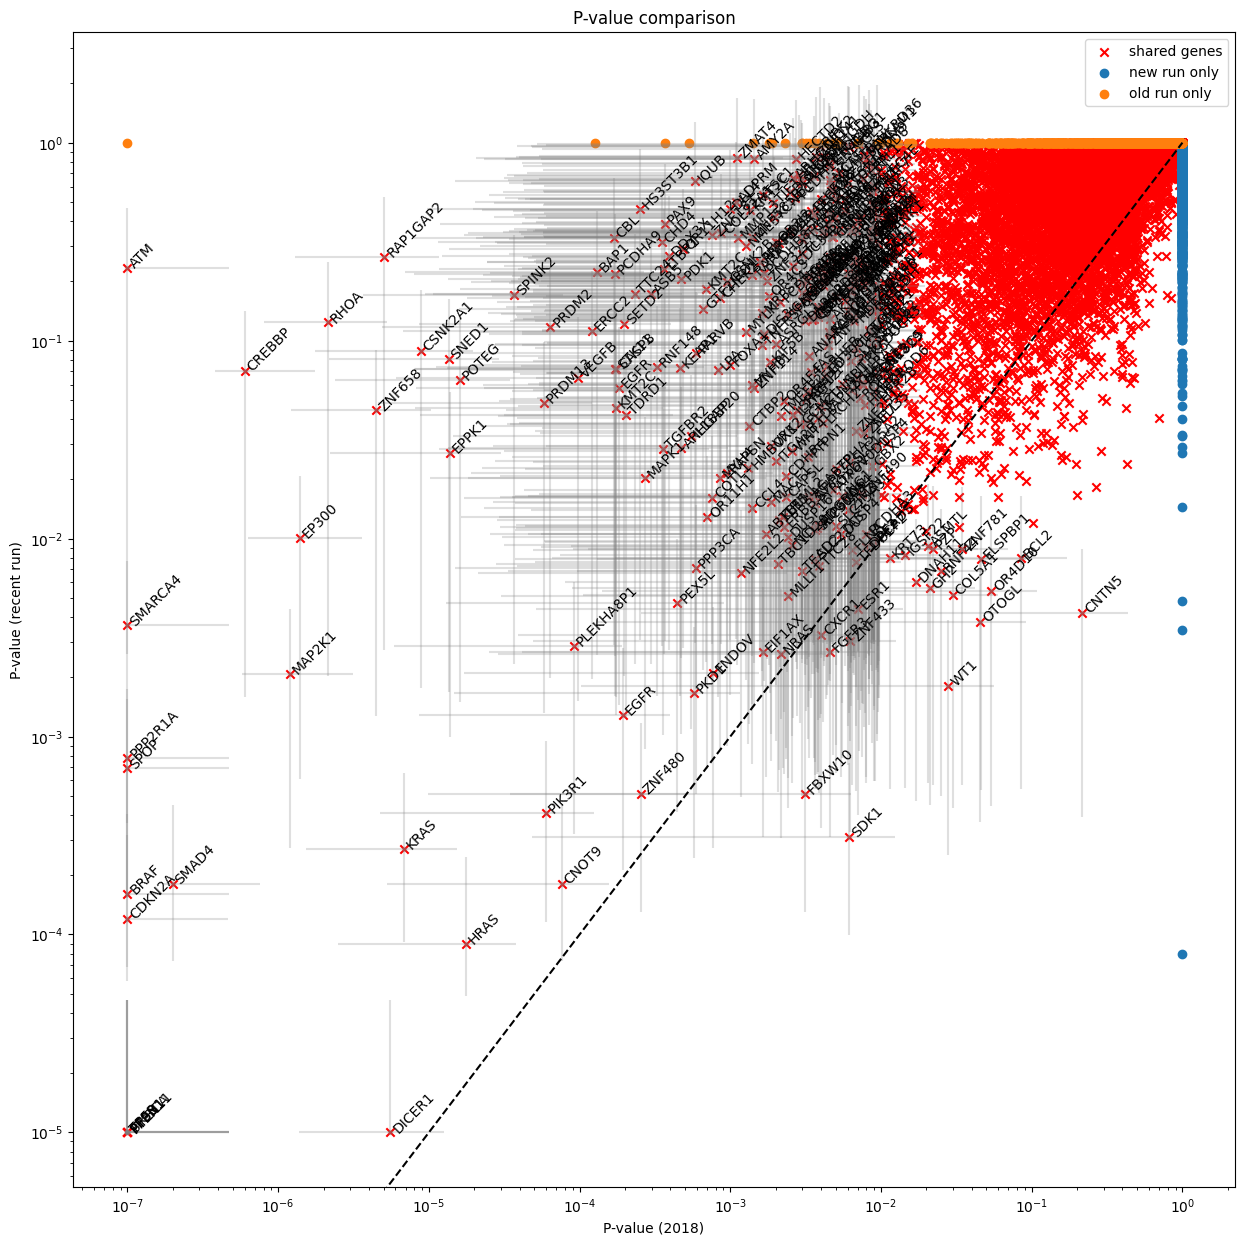

In [47]:
from scipy.stats import beta, betabinom





oldperm = 10000000
newperm = 100000




old_results.loc[old_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/oldperm
new_results.loc[new_results['CLUMPS_P'] == 0, 'CLUMPS_P'] = 1/newperm

results = pd.DataFrame(index=old_results.index)
results['oldps'] = old_results['CLUMPS_P']
results['newps'] = new_results['CLUMPS_P']

results = results.loc[(results['oldps'] < 0.01) | (results['newps'] < 0.01)]
results['gene'] = results.index.str.replace(':.*','')


olda = results['oldps']*oldperm
oldb = oldperm - results['oldps']*oldperm

old95ci = beta.interval(0.95,olda,oldb)

newa = results['newps']*newperm
newb = newperm - results['newps']*newperm

new95ci = beta.interval(0.95,newa,newb)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,15)



ax.errorbar(results['oldps'],results['newps'],xerr=old95ci,yerr=new95ci,marker='.',linestyle='',alpha=0.25,color='grey')
ax.scatter(old_results['CLUMPS_P'],new_results['CLUMPS_P'],marker='x',color='red')

ax.scatter(np.ones(len(new_only['CLUMPS_P'])),new_only['CLUMPS_P'])
ax.scatter(old_only['CLUMPS_P'],np.ones(len(old_only['CLUMPS_P'])))


oldtmp = old_only.loc[old_only['CLUMPS_P']<0.00001]

    

ax.plot([0, 1],[0, 1],linestyle='--',color='black')
ax.set_title('P-value comparison')
ax.set_xlabel('P-value (2018)')
ax.set_ylabel('P-value (recent run)')
plt.yscale("log")
plt.xscale("log")
plt.legend(['shared genes','new run only','old run only'])
for i in range(0,len(results.index)):
    ax.text(results.iloc[i]['oldps'],results.iloc[i]['newps'],results.iloc[i]['gene'],rotation=45,size=10)
#for i in range(0,len(oldtmp.index)):
#    ax.text(oldtmp.iloc[i]['CLUMPS_P'],1,oldtmp.iloc[i]['GENE_NAMES'],size=8)

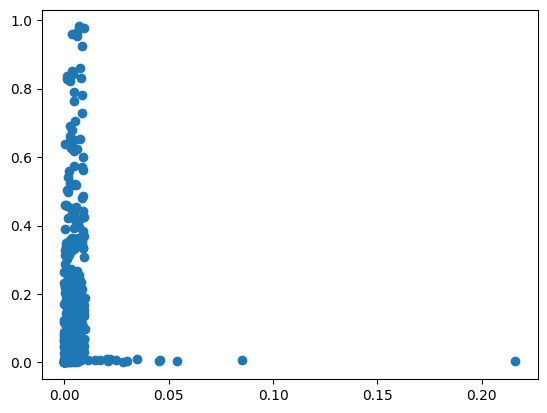

In [26]:
plt.scatter(results['oldps'],results['newps'])

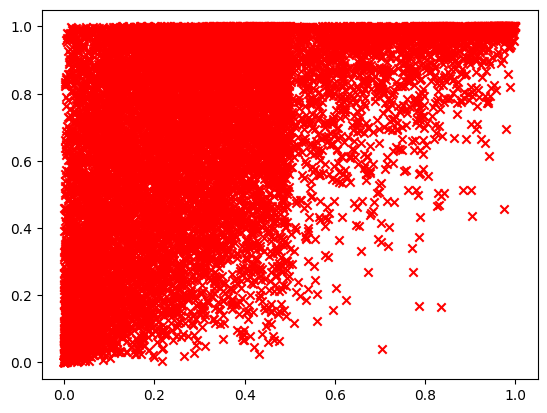

In [30]:
plt.scatter(old_results['CLUMPS_P'],new_results['CLUMPS_P'],marker='x',color='red')

In [9]:
fig.set_size_inches(1,1)

In [48]:
from scipy.stats import pearsonr
rho, p = pearsonr(results['oldps'],results['newps'])
print(rho)
print(p)

-0.06214405450668517
0.25811752542642347


In [11]:
results['gene']

ATM:5np1-A:3:3056             ATM
BRAF:3d4q-B:448:723          BRAF
PIK3CA:5fi4-A:2:1062       PIK3CA
PPP2R1A:1b3u-B:2:589      PPP2R1A
PTEN:5bug-A:14:351           PTEN
                           ...   
ELSPBP1:1gxd-A:17:223     ELSPBP1
OTOGL:4nt5-A:2244:2329      OTOGL
OR4D10:5tgz-A:4:301        OR4D10
BCL2:5fcg-A:6:203            BCL2
CNTN5:3b43-A:119:656        CNTN5
Name: gene, Length: 333, dtype: object

In [12]:
beta.interval(0.95,olda,oldb)

(array([2.53178105e-09, 2.53178105e-09, 2.53178105e-09, 2.53178105e-09,
        2.53178105e-09, 2.53178105e-09, 2.53178105e-09, 2.53178105e-09,
        2.53178105e-09, 2.53178105e-09, 2.50031276e-09, 2.42209312e-08,
        2.19592796e-07, 6.12907246e-07, 7.65393309e-07, 1.33926932e-06,
        3.25673040e-06, 3.77141667e-06, 4.19543778e-06, 5.30690500e-06,
        7.06681853e-06, 1.15937045e-05, 1.13188831e-05, 1.37091280e-05,
        1.51884252e-05, 3.32306863e-05, 5.53906276e-05, 5.34712574e-05,
        5.92332983e-05, 7.05958292e-05, 8.62474360e-05, 9.14755535e-05,
        1.13757936e-04, 1.23452059e-04, 1.67074428e-04, 1.60930089e-04,
        1.65344014e-04, 1.63574760e-04, 1.63634317e-04, 1.73916079e-04,
        1.85575600e-04, 1.88249993e-04, 1.94043169e-04, 2.23765668e-04,
        2.40922903e-04, 2.45102836e-04, 2.62587814e-04, 2.87023084e-04,
        3.16743068e-04, 3.40490235e-04, 3.50931295e-04, 3.55564934e-04,
        3.45526998e-04, 3.77267729e-04, 4.33160276e-04, 4.602926

In [13]:
results

,oldps,newps,gene
ATM:5np1-A:3:3056,1.000000e-07,0.233250,ATM
BRAF:3d4q-B:448:723,1.000000e-07,0.000160,BRAF
PIK3CA:5fi4-A:2:1062,1.000000e-07,0.000010,PIK3CA
PPP2R1A:1b3u-B:2:589,1.000000e-07,0.000780,PPP2R1A
PTEN:5bug-A:14:351,1.000000e-07,0.000010,PTEN
...,...,...,...
ELSPBP1:1gxd-A:17:223,4.600000e-02,0.007910,ELSPBP1
OTOGL:4nt5-A:2244:2329,4.550000e-02,0.003800,OTOGL
OR4D10:5tgz-A:4:301,5.400000e-02,0.005459,OR4D10
BCL2:5fcg-A:6:203,8.500000e-02,0.007940,BCL2


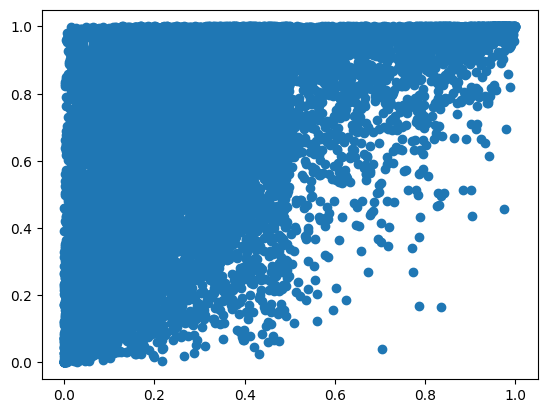

In [14]:
plt.scatter(old_results['CLUMPS_P'],new_results['CLUMPS_P'])

Text(0, 0.5, 'NSITES (recent run)')

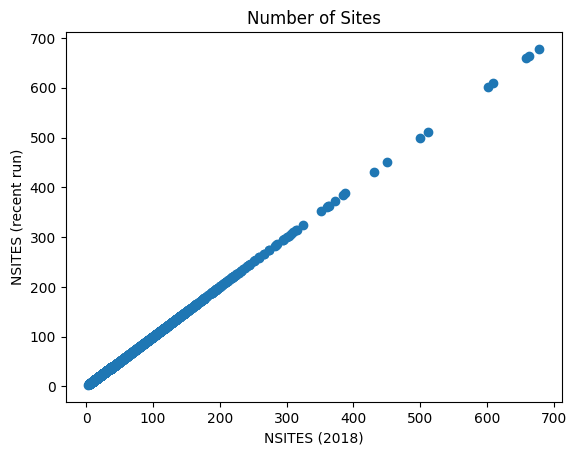

In [15]:
fig, ax = plt.subplots(1,1)

ax.scatter(old_results['NSITES'],new_results['NSITES'])
ax.set_title('Number of Sites')
ax.set_xlabel('NSITES (2018)')
ax.set_ylabel('NSITES (recent run)')

Text(0, 0.5, 'NSAMPS (recent run)')

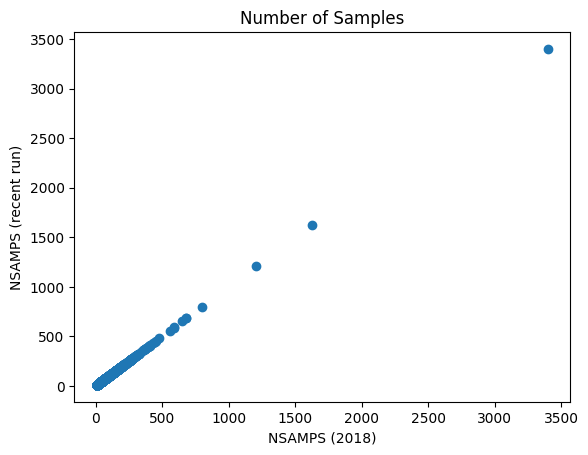

In [16]:
fig, ax = plt.subplots(1,1)


ax.scatter(old_results['NSAMPLES'],new_results['NSAMPLES'])

ax.set_title('Number of Samples')
ax.set_xlabel('NSAMPS (2018)')
ax.set_ylabel('NSAMPS (recent run)')

In [17]:
new_results.loc[old_results['NSAMPLES'] != new_results['NSAMPLES']]

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
IGHM:2agj-H:1:106,6035,IGHM,0.672500,1.0,39,34,5+6+7+19+20+21+22+25+36+37+41+44+47+51+52+53+5...,P01871,P01871,2agj-H,100.0,NaN,474.0,1,106,NaN,-1.0
IGKV2-30:3cfk-E:21:120,1513,IGKV2-30,0.222750,1.0,28,21,52+65+66+69+71+74+78+80+84+85+86+90+91+93+94+1...,P06310,Q8TCD0,3cfk-E,97.0,NaN,120.0,21,120,NaN,-1.0
KCNJ18:3spg-A:42:372,6802,KCNJ18,0.731875,1.0,171,117,45+46+49+53+58+60+61+62+64+66+73+75+77+79+80+8...,B7U540,F1NHE9,3spg-A,89.8,NaN,433.0,42,372,NaN,-1.0


In [18]:
old_results.loc[old_results['NSAMPLES'] != new_results['NSAMPLES']]

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
IGHM:2agj-H:1:106,IGHM,P01871,NaN,P01871,2agj-H,NaN,453.0,1,106,100.0,35,42,0.343,0.903267,-1.0,NaN
IGKV2-30:3cfk-E:21:120,IGKV2-30,P06310,NaN,Q8TCD0,3cfk-E,NaN,120.0,21,120,97.0,22,30,0.367,0.907870,-1.0,NaN
KCNJ18:3spg-A:42:372,KCNJ18,B7U540,NaN,F1NHE9,3spg-A,NaN,433.0,42,372,89.8,119,174,0.392,0.913857,-1.0,NaN


In [19]:
old_results.loc[old_results['NSITES'] != new_results['NSITES']]

,GENE_NAMES,UNIPROT_ID,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,NOTES
IGHM:2agj-H:1:106,IGHM,P01871,NaN,P01871,2agj-H,NaN,453.0,1,106,100.0,35,42,0.343,0.903267,-1.0,NaN
IGKV2-30:3cfk-E:21:120,IGKV2-30,P06310,NaN,Q8TCD0,3cfk-E,NaN,120.0,21,120,97.0,22,30,0.367,0.907870,-1.0,NaN
KCNJ18:3spg-A:42:372,KCNJ18,B7U540,NaN,F1NHE9,3spg-A,NaN,433.0,42,372,89.8,119,174,0.392,0.913857,-1.0,NaN
CTRB1:2cga-B:19:263,CTRB1,P17538,NaN,P00766,2cga-B,NaN,263.0,19,263,81.6,12,13,0.451,0.926575,-1.0,NaN


In [20]:
new_results.loc[new_results['GENE_NAMES']=='ATM']

,Unnamed: 0,GENE_NAMES,CLUMPS_P,CLUMPS_Q_FULL,NSAMPLES,NSITES,SITES,UNIPROT_ID,MAPPED_UNIPROT_ID,PDBID-CHAIN,PERCENT_IDENTITY,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,IN_CANCER_GENE_LISTS,CLUMPS_Q_RESTRICTED
ATM:5np1-A:3:3056,1579,ATM,0.23325,1.0,403,388,12+13+22+23+24+45+59+93+100+104+107+120+158+16...,Q13315,Q13315,5np1-A,100.0,NaN,3056.0,3,3056,ATM,1.0


In [21]:
new_results.loc[(new_results['CLUMPS_P']>0.01) & (old_results['CLUMPS_P']<0.0001)].to_csv('outlier_genes.txt',sep='\t')

In [22]:
new_results.loc[(new_results['CLUMPS_P']>0.01) & (old_results['CLUMPS_P']<0.0001)].to_csv('outlier_genes.txt',sep='\t')